In [30]:
import requests
import zipfile
import pandas as pd
import altair as alt
import squarify
import matplotlib.pyplot as plt


In [2]:
#### Replace location into artifacts\diabetes_meds_prices.csv
df_merge = pd.read_csv(r'C:\Users\syuan\OneDrive - Fresenius\Desktop\SKYRKT\593\artifacts\diabetes_meds_prices.csv')

In [390]:
len(df_merge)

2633

In [4]:
### double check the len of the file, if it is larger than 2633, pls run drop_duplicates
#df_merge = pd.read_csv(r'C:\Users\syuan\OneDrive - Fresenius\Desktop\SKYRKT\593\artifacts\diabetes_meds_prices.csv')
df_m=df_merge.drop_duplicates()
len(df_m)

2633

## Diabetes Product Portfolio (by product type)

In [19]:
### Prepare datast for barchart to show how many products are in each product class
df_class_prd=df_m[['ndc','SUBSTANCENAME','DB_CLASS']].drop_duplicates()
PRD_BAR = df_class_prd.groupby(['DB_CLASS'])['SUBSTANCENAME'].count().reset_index()
PRD_BAR = PRD_BAR.rename(columns={'SUBSTANCENAME': 'PRD_BY_CLASS'})
df_class_prd.head(3)

,ndc,SUBSTANCENAME,DB_CLASS
0,2751001,INSULIN LISPRO,Insulin
1,2751017,INSULIN LISPRO,Insulin
2,2751101,INSULIN LISPRO,Insulin


In [20]:
chart = alt.Chart(PRD_BAR).mark_bar().encode(
    x=alt.X('PRD_BY_CLASS:Q', title='Count of Product (Total:623)',scale=alt.Scale(domain=[0,180])),
    y=alt.Y('DB_CLASS:N', title='Product Class', sort='-x'),  # Sort by PRD_BY_CLASS in descending order
    color=alt.Color('PRD_BY_CLASS:Q', scale=alt.Scale(scheme='category20'),legend=None)
)

text = chart.mark_text(align='left', baseline='middle', dx=8).encode(
    text='PRD_BY_CLASS:Q'
)

Prd_by_Family = (chart + text).properties(
    width=300,  # Adjust the width of the chart as needed
    height=300,  # Adjust the height of the chart as needed
    title='Diabetes Products Count By Product Class'  # Add a title to the chart
)

Prd_by_Family.configure_axisX(grid=False) 

alt.LayerChart(...)

### Product Class Treemap by reimbursed units (Not Use)
Due to low effectivness, it is not presented at final slide deck

In [33]:
### Prepare dataset for treemap to group untis by DB_CLASS
df_PrdClass=df_m[['ndc','units_reimbursed','DB_CLASS']].drop_duplicates()
df_PrdClass=df_PrdClass.groupby(['DB_CLASS'])['units_reimbursed'].sum().reset_index()

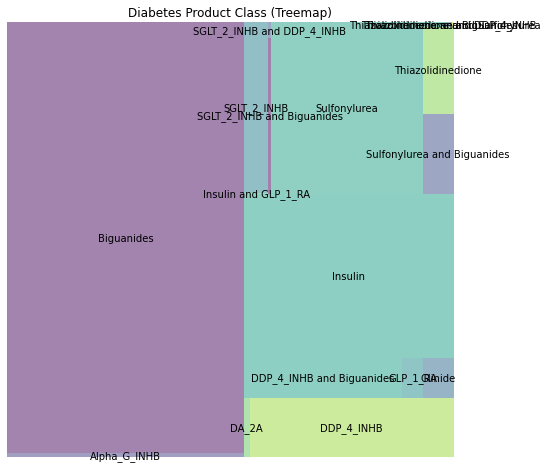

In [34]:
# Assuming 'df_agg_reim' is your DataFrame containing the data

# Create a treemap using squarify
plt.figure(figsize=(8, 8))

# Create a treemap using squarify
squarify.plot(
    sizes=df_PrdClass['units_reimbursed'],
    label=df_PrdClass['DB_CLASS'] ,
    alpha=0.5
)
plt.axis('off')  # Turn off axis labels
plt.title('Diabetes Product Class (Treemap)')
plt.show()

### Product Class by Total Reimbused Units

In [38]:

#df_units_yr.head(3)
df_only_yr=df_merge[['year','units_reimbursed']]
df_only_yr=df_merge.groupby(['year'])['units_reimbursed'].sum().reset_index()
df_only_yr

,year,units_reimbursed
0,2014,1.011797e+09
1,2015,1.399693e+09
2,2016,1.763237e+09
3,2017,1.873147e+09
4,2018,1.960869e+09
5,2019,1.969633e+09


### Line chart to show reimbursed units over years

In [67]:
line_yr = alt.Chart(df_only_yr).mark_line().encode(
    x=alt.X('year:O', title='Year'),  # Treat 'year' as ordinal (categorical) axis
    y=alt.Y('units_reimbursed:Q', title='Units Reimbursed'),
    color=alt.value('pink')  # Color lines by 'DB_CLASS'
).properties(
    width=600,  # Adjust the width of the chart as needed
    height=100,  # Adjust the height of the chart as needed
    title='Reimbursed Units Over Years'
)

text_yr = alt.Chart(df_only_yr).mark_text(
    align='left',
    baseline='top',
    dx=5,  # Adjust the horizontal offset for the labels as needed
).encode(
    x=alt.X('year:O', title='Year'),
    y=alt.Y('units_reimbursed:Q'),
    text=alt.Text("units_reimbursed:Q", format=",.0f")
    #text='estimated_patient_out_of_pocket:Q',  # Display the cost as text
)


line_yr+text_yr

alt.LayerChart(...)

### Bubble table to show the breakdown of drug classes' reimbursed units trend over years

In [48]:
df_tab_b=df_merge[['DB_CLASS','year','units_reimbursed']]
df_tab_b=df_merge.groupby(['year','DB_CLASS'])['units_reimbursed'].sum().reset_index()


In [51]:


alt.Chart(df_tab_b).mark_circle(size=100, color='pink').encode(
    y=alt.Y('year:O', title='Year'),  # Specify the y-axis title
    x=alt.X('DB_CLASS:N', title='Product Class', sort='-size'),  # Specify the x-axis title and sort by units_reimbursed in descending order
    size=alt.Size('units_reimbursed:Q', title='Units Reimbursed'),  # Specify the size as units_reimbursed
).properties(
    title='Units Reimbursed by Year and Product Class'
)

alt.Chart(...)

### Pie chart to show the reimbursed units share by drug class (hilight the top 5)

In [44]:
top_5_categories = df_PrdClass.nlargest(5, 'units_reimbursed')['DB_CLASS']
t5=list(top_5_categories)
t5

['Biguanides',
 'Insulin',
 'Sulfonylurea',
 'DDP_4_INHB',
 'DDP_4_INHB and Biguanides']

In [45]:
df_PrdClass=df_PrdClass.sort_values(by="units_reimbursed", ascending=False)
df_PrdClass['percentage'] = df_PrdClass['units_reimbursed'] / df_PrdClass['units_reimbursed'].sum()*100
df_PrdClass['percentage'] = df_PrdClass['percentage'].apply(lambda x: '{:.0f}%'.format(x))

df_PrdClass.head(5)                   

,DB_CLASS,units_reimbursed,percentage
1,Biguanides,5.244643e+09,53%
7,Insulin,1.776594e+09,18%
12,Sulfonylurea,1.330390e+09,13%
3,DDP_4_INHB,6.200660e+08,6%
4,DDP_4_INHB and Biguanides,3.227572e+08,3%


In [71]:
base = alt.Chart(df_PrdClass).encode(
    alt.Theta("units_reimbursed:Q").stack(True),
    alt.Radius("units_reimbursed").scale(type="sqrt", zero=True, rangeMin=20),
    color=alt.Color("DB_CLASS:N", scale=alt.Scale(scheme='category20c'), legend=None),
    order=alt.Order("units_reimbursed_sum:Q", sort="descending")
).mark_arc().properties(  # Sort in descending order
    width=380,
    height=380,
    title="Total Reimbursed Units Diabetes(2014 to 2019) by Product Class  "
)


c1 = base.mark_arc(innerRadius=20, stroke="#fff")

c2 = base.mark_text(fill='black').encode(
    text=alt.condition(
        alt.FieldOneOfPredicate(field='DB_CLASS', oneOf=t5),
        alt.Text('units_reimbursed:Q', format=",.0f"),  # Specify the data type as 'nominal'
        alt.value('')  # Display an empty string for categories not in the top 5
    ),
    #x=alt.X('10', title='DB_CLASS:N'),
     radius=alt.value(100),
     x=alt.value(170),  # Adjust the x-coordinate to move the labels to the left
    #y=alt.Y('y2:Q', title=None),

    angle=alt.value(0)  # Rotate the text to be horizontal
)


c3=base.mark_text(fill='red').encode(
    text=alt.condition(
        alt.FieldOneOfPredicate(field='DB_CLASS', oneOf=t5),
        'DB_CLASS',  # Specify the data type as 'nominal'
        alt.value('')  # Display an empty string for categories not in the top 5
    ),
    #x=alt.X('10', title='DB_CLASS:N'),
     radius=alt.value(100),
     x=alt.value(180),
    y=alt.value(180),# Adjust the x-coordinate to move the labels to the left
    #y=alt.Y('y2:Q', title=None),

    angle=alt.value(0)  # Rotate the text to be horizontal
)



c4=base.mark_text(fill='black').encode(
    text=alt.condition(
        alt.FieldOneOfPredicate(field='DB_CLASS', oneOf=t5),
        alt.Text('percentage:N')
       ,  # Specify the data type as 'nominal'
        alt.value('')  # Display an empty string for categories not in the top 5
    ),
    #x=alt.X('10', title='DB_CLASS:N'),
     radius=alt.value(100),
     x=alt.value(220),
    y=alt.value(190),# Adjust the x-coordinate to move the labels to the left
    #y=alt.Y('y2:Q', title=None),

    angle=alt.value(0)  # Rotate the text to be horizontal
)



c1 + c2+c3 +c4

alt.LayerChart(...)

### Line chart to show units trend by each diabetes product class (Not Used)
since the bubble table chart has better effectiveness and expressivness, we decide to use bubble table chart to present units trend by drug class

In [72]:
#df_agg_sub

df_agg_sub = df_m.groupby(['year','DB_CLASS'])['units_reimbursed'].sum().reset_index()

In [73]:

year_2019_df = df_tab_b[df_tab_b['year'] == 2019]

top_5_categories = df_agg_sub.groupby('DB_CLASS')['units_reimbursed'].sum().nlargest(5).index.tolist()

line_chart = alt.Chart(df_tab_b).mark_line().encode(
    x=alt.X('year:O', title='Year'),  # Treat 'year' as ordinal (categorical) axis
    y=alt.Y('units_reimbursed:Q', title='Units Reimbursed'),
    color='DB_CLASS:N',  # Color lines by 'DB_CLASS'
)

# Add text labels for 'DB_CLASS'
text_chart = alt.Chart(year_2019_df).mark_text(align='left', baseline='middle', dx=5).encode(
    x=alt.X('year:O'),  # Use the same x-axis as the line chart
    y=alt.Y('units_reimbursed:Q'),  # Use the same y-axis as the line chart
    text=alt.condition(
        alt.FieldOneOfPredicate(field='DB_CLASS', oneOf=top_5_categories),
        'DB_CLASS:N',
        alt.value('')  # Show an empty string for other categories
    )
)

# Combine the line chart and text chart
chart = (line_chart + text_chart).properties(
    width=600,  # Adjust the width of the chart as needed
    height=400,  # Adjust the height of the chart as needed
    title='Units Reimbursed by Diabetes Product Class Over Time (Show top 5 class label)'  # Add a title to the chart
)

chart

alt.LayerChart(...)

### Stackbar chart to show reimbursement amount componts per products by product class (not used)

In [52]:
df_reim=df_m[['SUBSTANCENAME','total_amount_reimbursed','DB_CLASS']].drop_duplicates()
df_agg_reim = df_reim.groupby(['SUBSTANCENAME','DB_CLASS'])['total_amount_reimbursed'].sum().reset_index()

In [53]:
stackbar_chart = alt.Chart(df_agg_reim ).mark_bar().encode(
    x=alt.X('sum(total_amount_reimbursed):Q', title='Total Amount Reimbursed'),
    y=alt.Y('DB_CLASS', title='Product Class',sort='-x'),
    color=alt.Color('SUBSTANCENAME:N', title='Product'),
).properties(
    width=600,  # Adjust the width of the chart as needed
    height=400,  # Adjust the height of the chart as needed
    title='Total Amount Reimbursed by DB_CLASS and Substance Name'
)

stackbar_chart

alt.Chart(...)

### Zoom Into Top 5 diabetes product class and product (not used)

In [54]:
top_3_db_classes = df_agg_reim.groupby('DB_CLASS')['total_amount_reimbursed'].sum().nlargest(3).index.tolist()
df_agg_reim_top_3 = df_agg_reim[df_agg_reim['DB_CLASS'].isin(top_3_db_classes)]

In [55]:
stackbar_T3 = alt.Chart(df_agg_reim_top_3).mark_bar().encode(
    x=alt.X('sum(total_amount_reimbursed):Q', title='Total Amount Reimbursed'),
    y=alt.Y('DB_CLASS', title='Top 5 Product Class by Total Amount Reimbursed',sort='-x'),
    color=alt.Color('SUBSTANCENAME:N', title='Product'),
)

labels = alt.Chart(df_agg_reim_top_3).mark_text(align='center', baseline='middle').encode(
    x=alt.X('sum(total_amount_reimbursed):Q'),  # Sort by 'total_amount_reimbursed' in descending order
    y=alt.Y('DB_CLASS',sort='-x'),
    #text=' ',
)


stackbar_chart_T3=(stackbar_T3+labels).properties(
    width=600,  # Adjust the width of the chart as needed
    height=400,  # Adjust the height of the chart as needed
    title='Total Amount Reimbursed by DB_CLASS and Substance Name'
)

stackbar_chart_T3

alt.LayerChart(...)

### Treemap of top 3 drug class (not used)

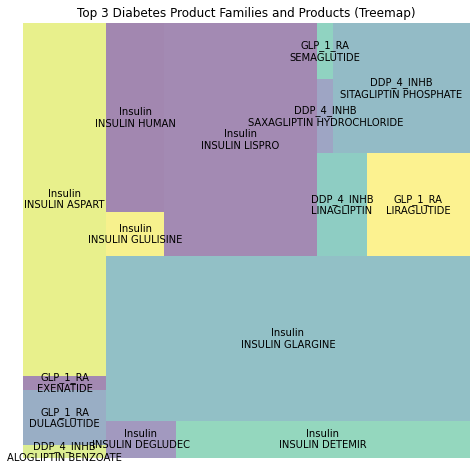

In [56]:
import matplotlib.pyplot as plt
import squarify
import pandas as pd

# Assuming 'df_agg_reim' is your DataFrame containing the data

# Create a treemap using squarify
plt.figure(figsize=(8, 8))

# Group the data by 'DB_CLASS' and 'SUBSTANCENAME' and sum the 'total_amount_reimbursed'
df_grouped = df_agg_reim.groupby(['DB_CLASS', 'SUBSTANCENAME'])['total_amount_reimbursed'].sum().reset_index()

# Create a treemap using squarify
squarify.plot(
    sizes=df_agg_reim_top_3['total_amount_reimbursed'],
    label=df_agg_reim_top_3['DB_CLASS'] + '\n' + df_agg_reim_top_3['SUBSTANCENAME'],
    alpha=0.5
)
plt.axis('off')  # Turn off axis labels
plt.title('Top 3 Diabetes Product Families and Products (Treemap)')
plt.show()

### Cost Trend over year

In [57]:
df_agg_class = df_m.groupby(['year','DB_CLASS'])['estimated_patient_out_of_pocket'].sum().reset_index()
df_agg_all = df_m.groupby(['year'])['estimated_patient_out_of_pocket'].sum().reset_index()

#locale.setlocale(locale.LC_ALL, '')
#df_agg_all['estimated_patient_out_of_pocket'] = df_agg_all['estimated_patient_out_of_pocket'].apply(lambda x: locale.format_string('%d', round(x), grouping=True))

df_agg_all

,year,estimated_patient_out_of_pocket
0,2014,1.970007e+09
1,2015,2.961447e+09
2,2016,3.684551e+09
3,2017,4.063220e+09
4,2018,4.113690e+09
5,2019,4.502503e+09


### Line chart to show total cost trend over years ( not used)

In [76]:
line_chart = alt.Chart(df_agg_all).mark_line().encode(
    x='year:O',  # Use year as a temporal field
    y=alt.Y('estimated_patient_out_of_pocket:Q', title='Estimated Patient Cost'),
    tooltip=['year:T', 'estimated_patient_out_of_pocket:Q'],
    color=alt.value('pink')# Show tooltips with year and cost
).properties(
    width=600,  # Adjust the width of the chart as needed
    height=180,  # Adjust the height of the chart as needed
    title='Estimated Total Patient Cost Trend Over Years'
)

circle = alt.Chart(df_agg_all).mark_point(shape='square',color='pink').encode(
    x='year:O',
    y=alt.Y('estimated_patient_out_of_pocket:Q', title='Estimated Patient Cost'),
    tooltip=['year:T', 'estimated_patient_out_of_pocket:Q'],
)

# Create text labels using mark_text()
text = alt.Chart(df_agg_all).mark_text(
    align='left',
    baseline='top',
    dx=5,  # Adjust the horizontal offset for the labels as needed
).encode(
    x=alt.X('year:O', title='Year'),
    y=alt.Y('estimated_patient_out_of_pocket:Q', title='Estimated Patient Cost'),
    text=alt.Text("estimated_patient_out_of_pocket:Q", format=",.0f")
    #text='estimated_patient_out_of_pocket:Q',  # Display the cost as text
)


line_chart_Final=line_chart+circle+text

line_chart_Final

alt.LayerChart(...)

### Cost Trend by Drug Class (not used)

In [59]:
line_chart2 = alt.Chart(df_agg_class).mark_line().encode(
    x='year:O',  # Use year as a temporal field
    y=alt.Y('estimated_patient_out_of_pocket:Q', title='Estimated Patient Cost'),
    color='DB_CLASS:N',  # Color by DB_CLASS
    tooltip=['year:T', 'estimated_patient_out_of_pocket:Q', 'DB_CLASS:N'],  # Show tooltips with year, cost, and DB_CLASS
).properties(
    width=600,  # Adjust the width of the chart as needed
    height=400,  # Adjust the height of the chart as needed
    title='Estimated Patient Cost Trend by DB_CLASS Over Years'
)

line_chart2

alt.Chart(...)

### Violin Plot by Durg Class (Not Used)

In [60]:
df_agg_class_cost = df_m[['ndc','SUBSTANCENAME','units_reimbursed','DB_CLASS','estimated_patient_out_of_pocket']].drop_duplicates()
df_agg_class_cost['avg_patient_cost']=df_agg_class_cost['estimated_patient_out_of_pocket']/df_agg_class_cost['units_reimbursed']
#df_agg_class_cost=df_agg_class_cost(['DB_CLASS','SUBSTANCENAME'])['avg_patient_cost'].mean().reset_index()
#df_agg_class_cost

df_agg_class_cost['Cost_Prd'] = df_agg_class_cost.groupby('SUBSTANCENAME')['avg_patient_cost'].transform('mean')

df_agg_class_cost=df_agg_class_cost[['SUBSTANCENAME','DB_CLASS','Cost_Prd']].drop_duplicates()


In [61]:
alt.Chart(df_agg_class_cost).transform_density(
    'Cost_Prd',
    as_=['Cost_Prd', 'density'],
    extent=[min(df_agg_class_cost['Cost_Prd']), df_agg_class_cost['Cost_Prd'].quantile(0.90)],
    groupby=['DB_CLASS']
).mark_area(orient='horizontal').encode(
    y='Cost_Prd:Q',
    color='DB_CLASS:N',
    x=alt.X(
        'density:Q',
        stack='center',
        impute=None,
        title=None,
        axis=alt.Axis(labels=False, values=[0],grid=False, ticks=True),
    ),
    column=alt.Column(
        'DB_CLASS:N',
        header=alt.Header(
            titleOrient='bottom',
            labelOrient='bottom',
            labelPadding=0,
        ),
    )
).properties(
    width=120
).configure_facet(
    spacing=0
).configure_view(
    stroke=None
)

alt.Chart(...)

#### Since a few drug classes has significant difference from other gourps, having all classes ploted by Violin do not show great effectivness. We decide to use boxplot chart and break all classes into three segments. 

### Boxplot to show cost distribution

#### Cost of Drug Class over $20

In [62]:
df_classx_GLP=df_agg_class_cost[df_agg_class_cost['DB_CLASS'] == 'GLP_1_RA']

# Create the box plot with pink color
box_plot1 = alt.Chart(df_classx_GLP).mark_boxplot(extent='min-max', color='pink').encode(
    x=alt.X('DB_CLASS:O', title='Product Class',axis=alt.Axis(labelAngle=-45)),  # Specify the x-axis title
    y=alt.Y('Cost_Prd:Q', title='Out of Pocket Cost', axis=alt.Axis(format='$,.2f'))  # Specify the y-axis title and format as currency
).properties(
    height=200  # Adjust the height as needed
)

# Set the chart title
box_plot1 = box_plot1.properties(
    title='Cost by Product Class above $20'  # Specify the chart title
)

box_plot1

alt.Chart(...)

#### Cost of Drug Class $\$$6 to $\$$20.

In [63]:
df_classx_2=df_agg_class_cost[df_agg_class_cost['DB_CLASS'].isin(['Insulin','Insulin and GLP_1_RA'])]



# Create the box plot with pink color
box_plot2 = alt.Chart(df_classx_2).mark_boxplot(extent='min-max', color='pink').encode(
    x=alt.X('DB_CLASS:O', title='Product Class',axis=alt.Axis(labelAngle=-45)),  # Specify the x-axis title
    y=alt.Y('Cost_Prd:Q', title='Out of Pocket Cost', axis=alt.Axis(format='$,.2f'))  # Specify the y-axis title and format as currency
).properties(
    height=200  # Adjust the height as needed
)

# Set the chart title
box_plot2 = box_plot2.properties(
    title='Cost by Product Class $6 to $20'  # Specify the chart title
)

box_plot2

alt.Chart(...)

### Cost of Drug Class below $\$$6

In [64]:
df_classx_3=df_agg_class_cost[~df_agg_class_cost['DB_CLASS'].isin(['Insulin', 'GLP_1_RA','Insulin and GLP_1_RA'])]

# Create the box plot with pink color
box_plot3 = alt.Chart(df_classx_3).mark_boxplot(extent='min-max', color='pink').encode(
    x=alt.X('DB_CLASS:O', title='Product Class',axis=alt.Axis(labelAngle=-45)),  # Specify the x-axis title
    y=alt.Y('Cost_Prd:Q', title='Out of Pocket Cost', axis=alt.Axis(format='$,.2f'))  # Specify the y-axis title and format as currency
).properties(
    height=200,
    width=500# Adjust the height as needed
)

# Set the chart title
box_plot3 = box_plot3.properties(
    title='Cost by Product Class below $6'  # Specify the chart title
)

box_plot3

alt.Chart(...)